In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [9]:
# 读取文件，默认都进来时一个data frame
df = pd.read_csv('date111.csv')
# 这可以打印前5行出来，你可以看到这个表格的表头还有index
print(df.head())
# 这里显示基本的信息，比如有多少行多少列
print(df.info())

        时间  负荷功率(p.u.)  风电功率(p.u.)
0  0:00:00    0.416791    0.146170
1  0:15:00    0.426974    0.170831
2  0:30:00    0.445712    0.129716
3  0:45:00    0.432879    0.103549
4  1:00:00    0.427675    0.185014
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   时间          96 non-null     object 
 1   负荷功率(p.u.)  96 non-null     float64
 2   风电功率(p.u.)  96 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.4+ KB
None


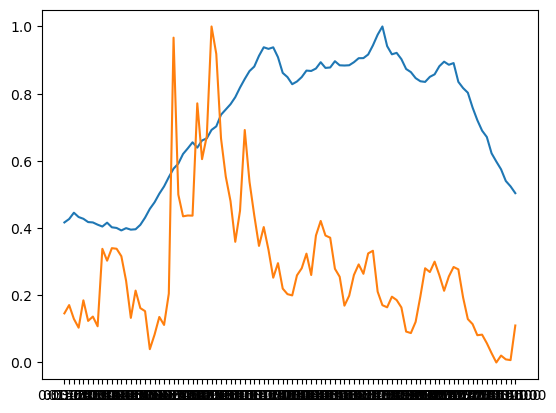

In [10]:
x=df['时间']
y1=df['负荷功率(p.u.)']
y2=df['风电功率(p.u.)']
plt.plot(x, y1)
plt.plot(x, y2)

In [13]:
# 下限矩阵
lb = [180, 90, 45]
# 上限矩阵
ub = [600, 300, 150]
# 初值
x0 = [0, 0, 0]
# 做成优化器能够认识的上下限
bounds = [[lb[i], ub[i]] for i in range(3)]

# 定义目标函数


def objective(p): return (0.226 * p[0] ** 2 + 30.42 * p[0] + 786.8 )*1050+\
     (0.588* p[1] ** 2 + 65.12 * p[1] + 451.32)*1050+\
     (0.785*p[2]**2+139.6*p[2]+1049.5)*1050
a=np.empty((96,3))
i=0
while i<96:
     # 添加约束，这里我们就添加一个等式约束，eq表示表达式为0，ineq表示表达式大于等于0
     cons = [{'type': 'eq', 'fun': lambda p: p[0] + p[1]+p[2] - 900*df.loc[i,["负荷功率(p.u.)"]]}]
     # 求解
     res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
     # 返回值和我们前面说的linprog返回的结果意思基本是一样的
     a[i,:]=res.x
     i+=1
print(res)
print(a)

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 56067948.99507361
       x: [ 3.164e+02  9.211e+01  4.500e+01]
     nit: 10
     jac: [ 1.821e+05  1.821e+05  2.208e+05]
    nfev: 27
    njev: 6
[[180.          90.          45.        ]
 [180.          90.          45.        ]
 [266.14079999  90.          45.00000001]
 [254.5911      90.          45.        ]
 [180.          90.          45.        ]
 [241.11        90.          45.        ]
 [180.          90.          45.        ]
 [234.15841305  90.00227546  45.        ]
 [229.15439992  90.00000005  45.00000003]
 [239.49900009  90.          45.        ]
 [180.          90.          45.        ]
 [225.33024702  90.          45.00219852]
 [180.          90.          45.        ]
 [224.8065      90.          45.        ]
 [180.          90.          45.        ]
 [180.          90.          45.        ]
 [233.68500001  90.          45.        ]
 [253.02959997  90.00000002  45.00000001]
 [2

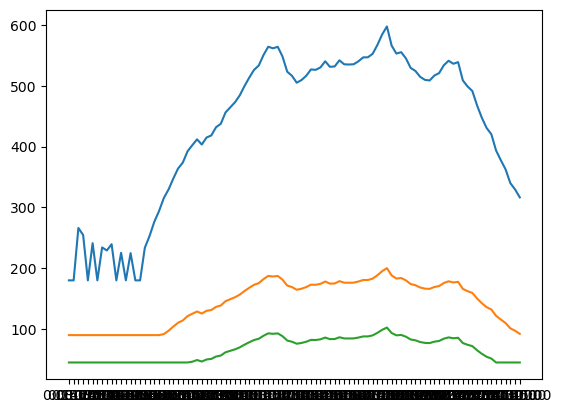

In [12]:
plt.plot(x,a[:,0])
plt.plot(x,a[:,1])
plt.plot(x,a[:,2])